# Creating a 6 x 8 image

* A Grayscale Image

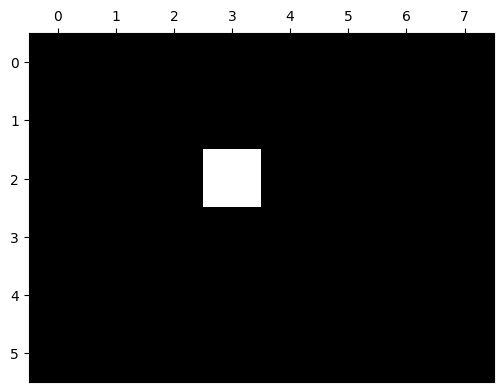

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im=np.zeros((6,8),dtype=np.uint8)
im[2,3]=255
fig,ax=plt.subplots(1,1,figsize=(6,8))
ax.imshow(im,cmap='gray',vmin=0,vmax=255)
ax.xaxis.set_ticks_position('top')
plt.show()

* A color Image

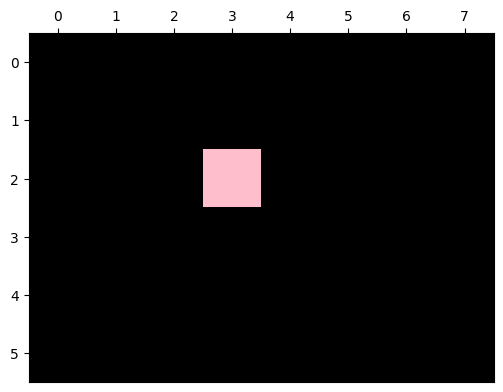

In [2]:
im=np.zeros((6,8,3),dtype='uint8')
im[2,3]=(255,190,203)
fig,ax=plt.subplots(1,1,figsize=(6,8))
ax.imshow(im)
ax.xaxis.set_ticks_position('top')
plt.show()

# Image Opening and Displaying

* Displaying using Matplotlib

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


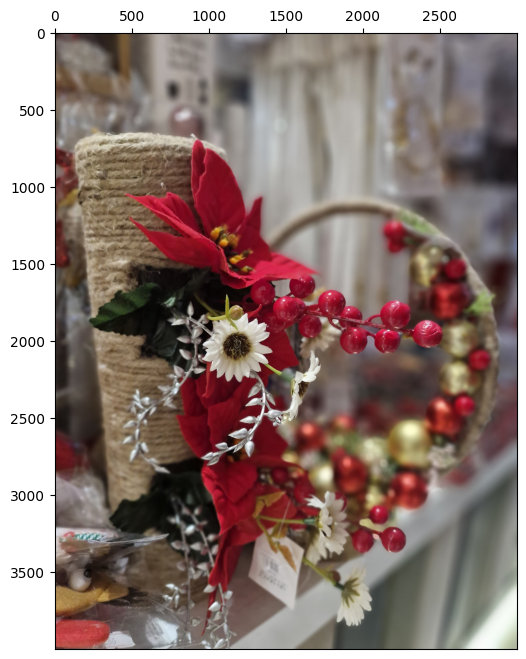

In [3]:
im=cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg')
fig,ax=plt.subplots(1,1,figsize=(6,8))
ax.imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()


# Displaying Image Properties

In [4]:
print('Image Shape:',im.shape)
print('Image Data Type:',im.dtype)
print('Image Size',im.size)

Image Shape: (4000, 3000, 3)
Image Data Type: uint8
Image Size 36000000


# Increasing the brightness

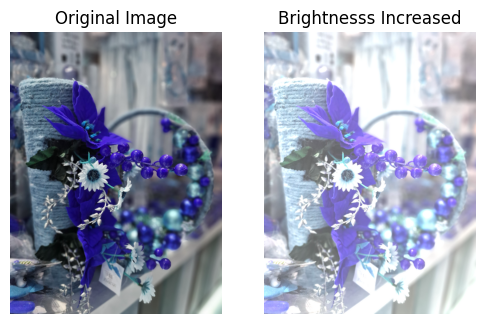

In [7]:
im1=cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg')
cv.IMREAD_GRAYSCALE
im2=cv.add(im1,100)
fig,ax=plt.subplots(1,2,figsize=(6,8))
ax[0].imshow(im1,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(im2,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Brightnesss Increased')
for a in ax:
  a.axis('off')
plt.show()

# Obtaining One Color Plane

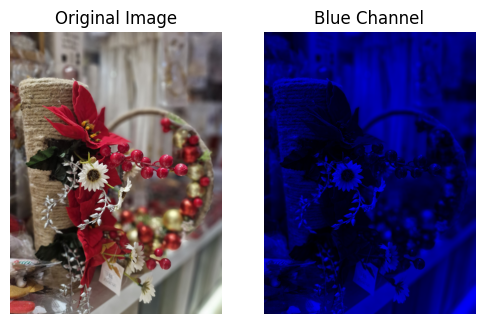

In [9]:
im=cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg')
im_blue=im.copy()
im_blue[:,:,1]=0
im_blue[:,:,2]=0
fig,ax=plt.subplots(1,2,figsize=(6,8))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(im_blue,cv.COLOR_BGR2RGB))
ax[1].set_title('Blue Channel')
for a in ax:
  a.axis('off')
plt.show()

# Intensity Transformations

# 1.Identity transform

In [13]:
f=cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg')
cv.IMREAD_GRAYSCALE
t=np.arange(256,dtype=np.uint8)
g=t[f]


# 2.Negative transform

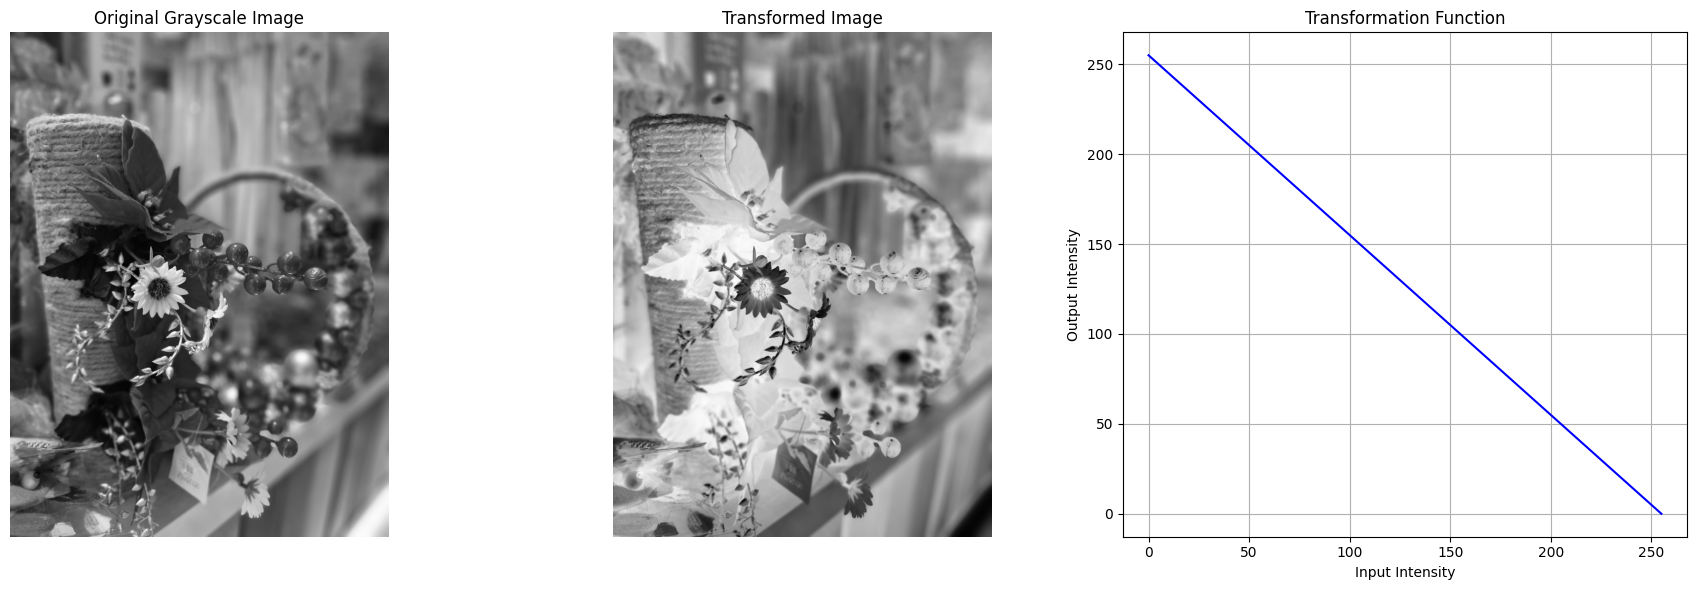

In [14]:


# Read the image in grayscale
f = cv.imread(import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
f = cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg', cv.IMREAD_GRAYSCALE)

# Check if image loaded
if f is None:
    print("Image not found!")
else:
    # Define transformation function (example: invert)
    t = np.arange(256, dtype=np.uint8)
    t = 255 - t  # Example transformation: negative image

    # Apply transformation using lookup table
    g = t[f]

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Original image
    axs[0].imshow(f, cmap='gray')
    axs[0].set_title('Original Grayscale Image')
    axs[0].axis('off')

    # Transformed image
    axs[1].imshow(g, cmap='gray')
    axs[1].set_title('Transformed Image')
    axs[1].axis('off')

    # Transformation function
    axs[2].plot(np.arange(256), t, color='blue')
    axs[2].set_title('Transformation Function')
    axs[2].set_xlabel('Input Intensity')
    axs[2].set_ylabel('Output Intensity')
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()


# Check if image loaded
if f is None:
    print("Image not found!")
else:
    # Define transformation function (example: invert)
    t = np.arange(256, dtype=np.uint8)
    t = 255 - t  # Example transformation: negative image

    # Apply transformation using lookup table
    g = t[f]

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Original image
    axs[0].imshow(f, cmap='gray')
    axs[0].set_title('Original Grayscale Image')
    axs[0].axis('off')

    # Transformed image
    axs[1].imshow(g, cmap='gray')
    axs[1].set_title('Transformed Image')
    axs[1].axis('off')

    # Transformation function
    axs[2].plot(np.arange(256), t, color='blue')
    axs[2].set_title('Transformation Function')
    axs[2].set_xlabel('Input Intensity')
    axs[2].set_ylabel('Output Intensity')
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()


# Intensity windowing

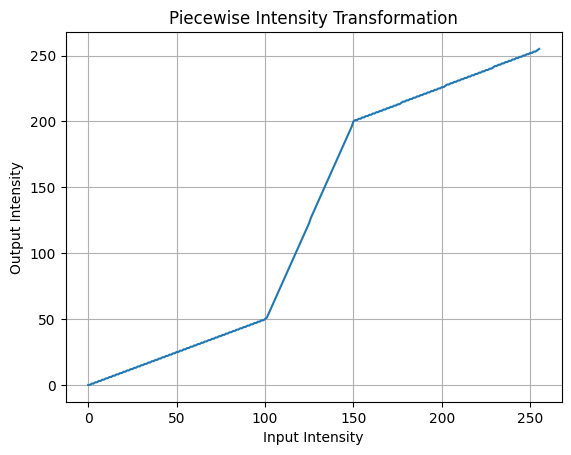

In [16]:
c=np.array([(100,50),(150,200)])

t1=np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
t2=np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
t3=np.linspace(c[1,1]+1,255,255-c[1,0]).astype('uint8')

transform=np.concatenate((t1,t2),axis=0).astype('uint8')
transform=np.concatenate((transform,t3),axis=0).astype('uint8')

img_org=cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg')
image_transformed=cv.LUT(img_org,transform)

plt.plot(np.arange(256), transform)
plt.title("Piecewise Intensity Transformation")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.show()

# Gamma Correction

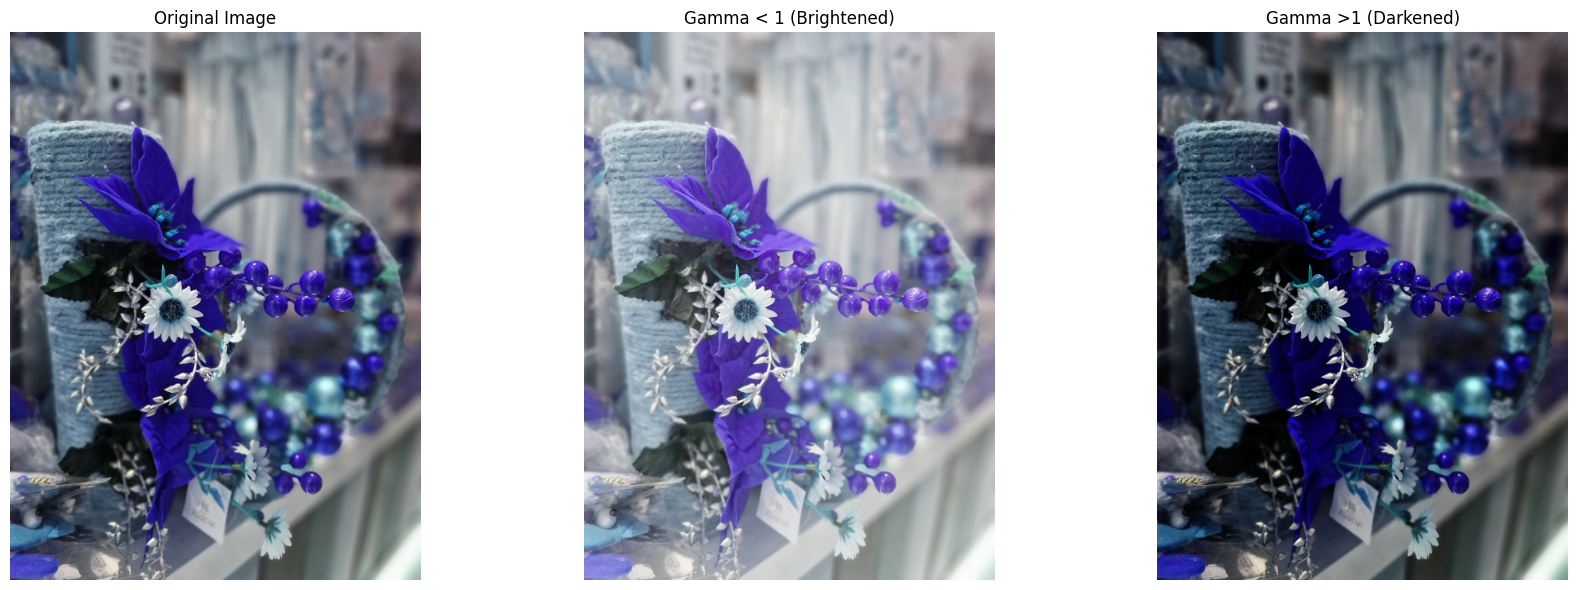

In [20]:

gamma_low=0.5
gamma_high=1.5

f=cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg')

t1=np.array([(i/255.0)**(gamma_low)*255 for i in np.arange(0,256)]).astype(np.uint8)
t2=np.array([(i/255.0)**(gamma_high)*255 for i in np.arange(0,256)]).astype(np.uint8)

g1=cv.LUT(f,t1)
g2=cv.LUT(f,t2)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(f, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(g1, cmap='gray')
axs[1].set_title('Gamma < 1 (Brightened)')
axs[1].axis('off')

axs[2].imshow(g2,cmap='gray')
axs[2].set_title('Gamma >1 (Darkened)')
axs[2].axis('off')


plt.tight_layout()
plt.show()


# Histogram Equalization

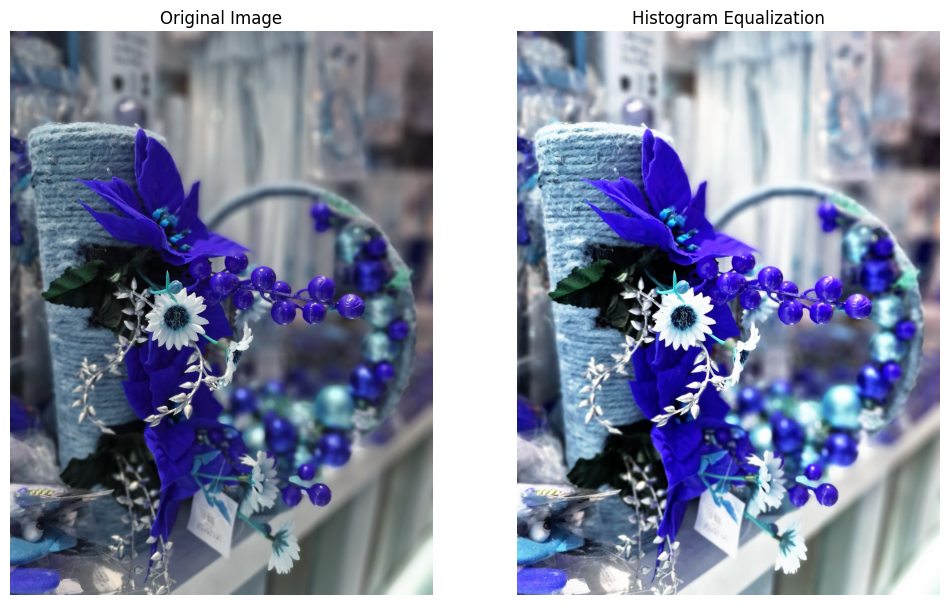

In [24]:
f=cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg')

L=256
M=4000
N=3000

hist = cv.calcHist([f], [0], None, [256], [0,256]).flatten()

cdf = np.cumsum(hist)

t=np.array([(L-1)/(M*N)*cdf[k] for k in range(256)],dtype=np.uint8)
g=t[f]



fig,ax=plt.subplots(1,2,figsize=(12,8))

ax[0].imshow(f,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')

plt.show()

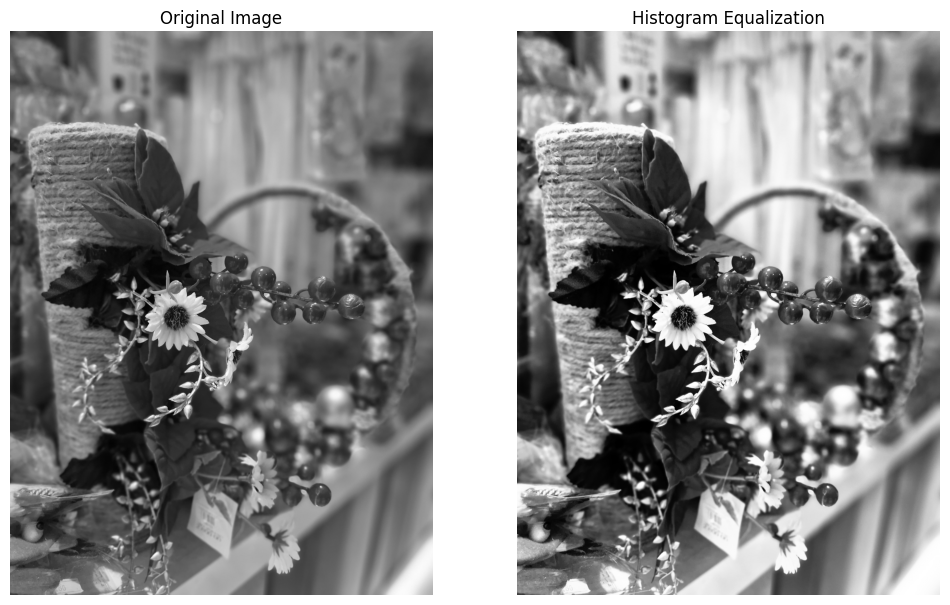

In [26]:
f_color=cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg')
f_gray = cv.cvtColor(f_color, cv.COLOR_BGR2GRAY)

g=cv.equalizeHist(f_gray)

fig,ax=plt.subplots(1,2,figsize=(12,8))

ax[0].imshow(f_gray,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')

plt.show()